<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [15]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-10 22:06:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  59.5MB/s    in 3.4s    

2025-09-10 22:06:42 (59.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [16]:
!pip install pandas

In [17]:
!pip install matplotlib
!pip install seaborn

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [19]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [20]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [21]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [22]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


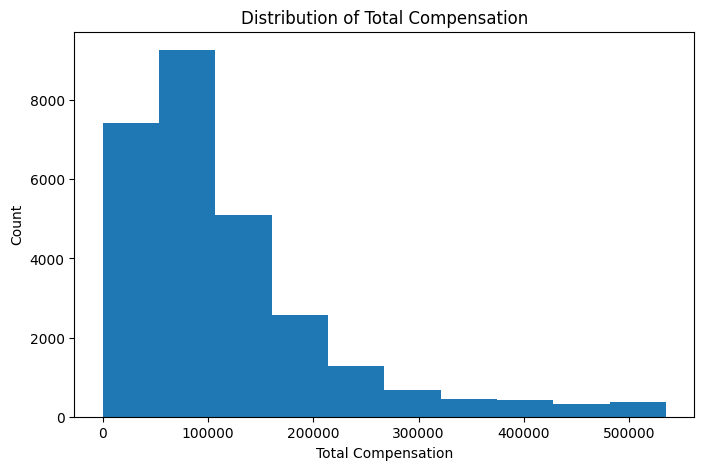

In [23]:
## Write your code here

# Load CompTotal column into a DataFrame
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)

df = df.dropna(subset=['CompTotal'])

# Calculate Q1 and Q3
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

df_no_outliers['CompTotal'].plot(kind='hist', figsize=(8, 5))
# add a title to the histogram
plt.title('Distribution of Total Compensation')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('Total Compensation')

plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


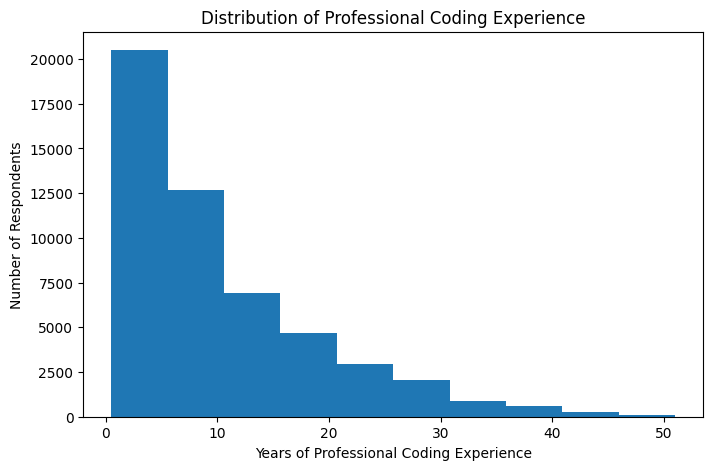

In [32]:
## Write your code here

# Load CompTotal column into a DataFrame
df = pd.read_sql_query("SELECT YearsCodePro FROM main", conn)

df = df.dropna(subset=['YearsCodePro'])

mapping_dict = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_dict)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'].unique()

df['YearsCodePro'].plot(kind='hist', figsize=(8, 5))
plt.title("Distribution of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


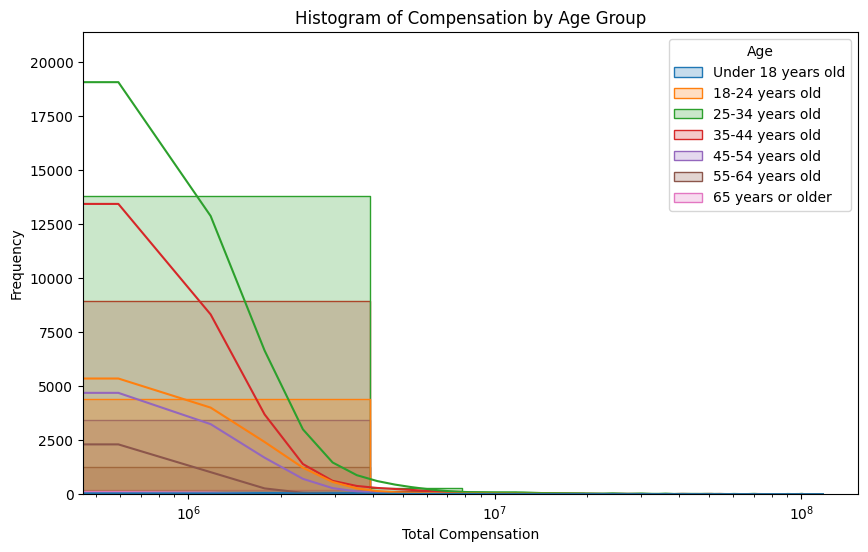

In [26]:
## Write your code here

df = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)

# Define age categories in order
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]

# Ensure Age is categorical
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Convert CompTotal to numeric & drop NaNs
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal", "Age"])  

# Remove extreme outliers (top 1%)
q99 = df["CompTotal"].quantile(0.99)
df_filtered = df[df["CompTotal"] < q99]

# Plot histograms for each Age group
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="CompTotal", hue="Age", bins=30, kde=True, element="step")

# Labels and title
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation by Age Group")
plt.xscale("log")  # Log scale for better visualization

# Show plot
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


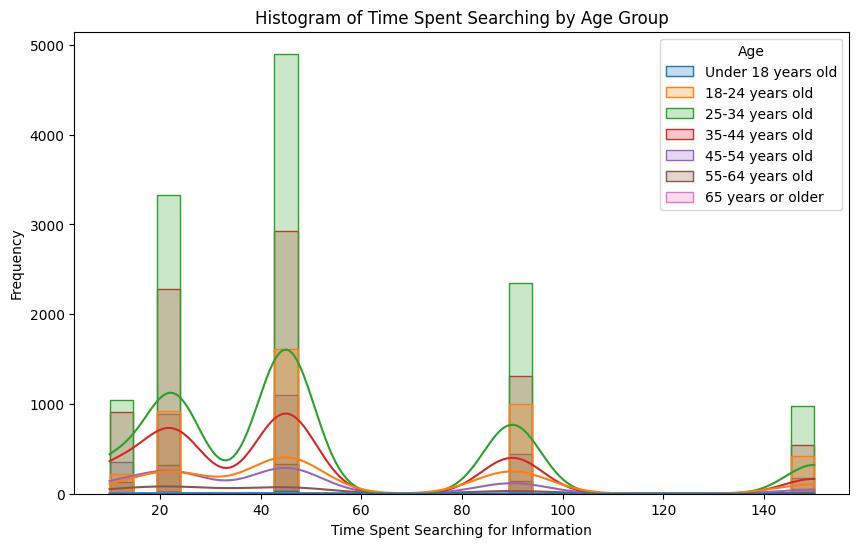

In [33]:
## Write your code here

df = pd.read_sql_query("SELECT Age, TimeSearching FROM main", conn)

# Define age categories in order
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]

# Ensure Age is categorical
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Mapping TimeSearching column
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df['TimeSearchingNum'] = df['TimeSearching'].map(time_mapping)

# Drop any rows with missing values 
df_clean = df.dropna(subset=['TimeSearchingNum', 'Age'])

# Plot histogram with hue = Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean,x='TimeSearchingNum',hue='Age',bins=30,kde=True,element='step')

plt.xlabel('Time Spent Searching for Information')
plt.ylabel('Frequency')
plt.title('Histogram of Time Spent Searching by Age Group')
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


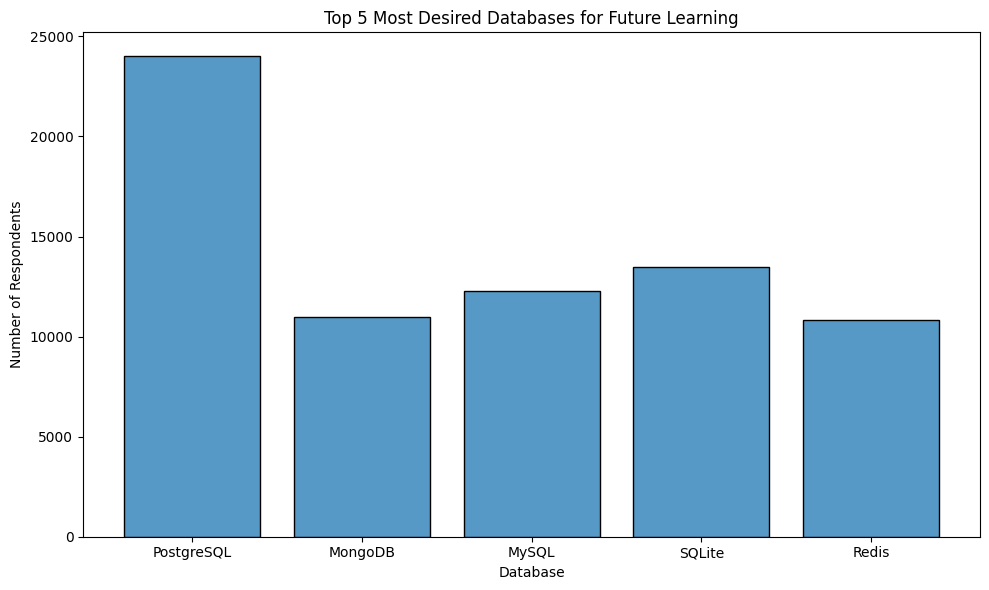

In [43]:
## Write your code here

df = pd.read_sql_query("SELECT DatabaseWantToWorkWith FROM main", conn)
df = df.dropna(subset=['DatabaseWantToWorkWith'])

df_clean = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()
# Top 5 databases
top5 = df_clean.value_counts().head(5).index

# Filter only rows containing top 5
filtered = df_clean[df_clean.isin(top5)]

# Plot histogram with hue = Age
plt.figure(figsize=(10, 6))
sns.histplot(
    x=filtered,
    discrete=True,
    shrink=0.8,
)

# Labels
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 5 Most Desired Databases for Future Learning")

plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


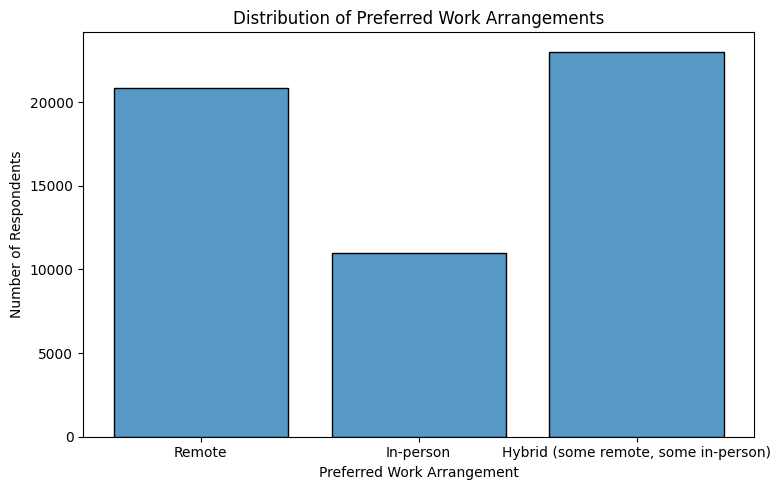

In [39]:
## Write your code here
# Load data
df = pd.read_sql_query("SELECT RemoteWork FROM main", conn)

# Drop missing values
df = df.dropna(subset=["RemoteWork"])

# Plot using histplot
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x="RemoteWork",
    discrete=True,
    shrink=0.8,
)

# Labels and title
plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Preferred Work Arrangements")

plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


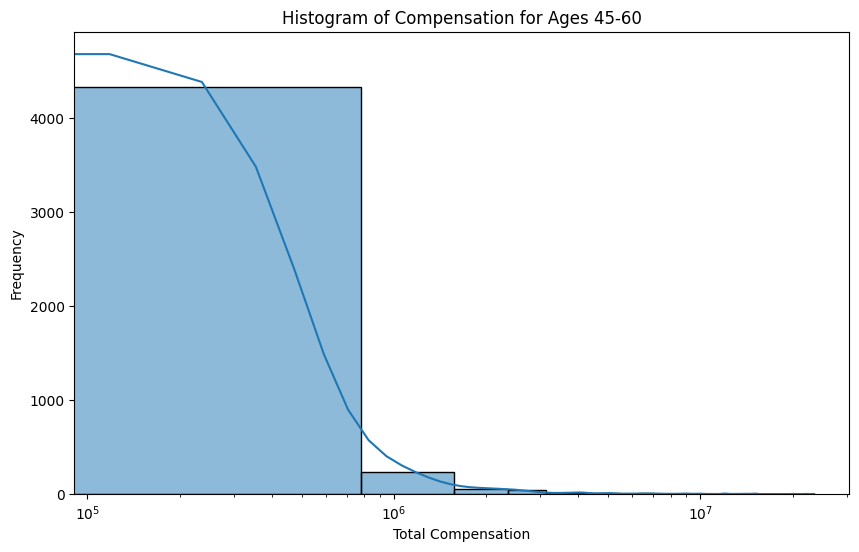

In [54]:
## Write your code here

df_filtered = pd.read_sql_query("SELECT Age, CompTotal FROM main", conn)

# Filter for ages 45–60 (age groups 45-54 and 55-64)
df_filtered = df_filtered[df_filtered["Age"].isin(["45-54 years old", "55-64 years old"])]

# Convert CompTotal to numeric and drop NaNs
df_filtered["CompTotal"] = pd.to_numeric(df_filtered["CompTotal"], errors="coerce")
df_filtered = df_filtered.dropna(subset=["CompTotal"])

# Remove extreme outliers (top 1%)
q99 = df_filtered["CompTotal"].quantile(0.99)
df_filtered = df_filtered[df_filtered["CompTotal"] < q99]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered, x="CompTotal", bins=30, kde=True)

# Labels and title
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation for Ages 45-60")
plt.xscale("log")  # Log scale for better readability

plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


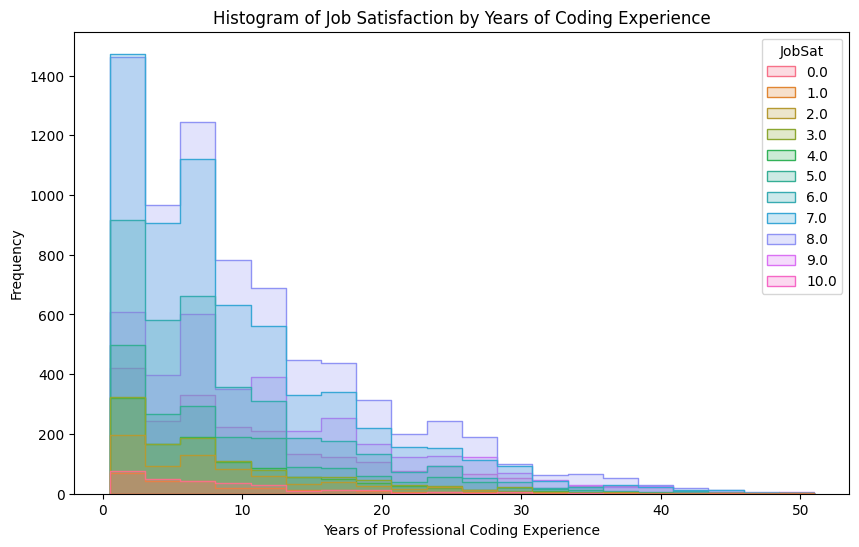

In [34]:
## Write your code here

# Load data
df = pd.read_sql_query("SELECT JobSat, YearsCodePro FROM main", conn)

# Mapping YearsCodePro categories to numeric values
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Replace mapped values and convert to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace(years_mapping)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Ensure JobSat is categorical
df['JobSat'] = df['JobSat'].astype('category')

# Drop missing values
df_filtered = df.dropna(subset=['JobSat','YearsCodePro'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="YearsCodePro", hue="JobSat",bins=20, element="step")

# Labels and title
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Job Satisfaction by Years of Coding Experience")
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [13]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
